# 04 - EDA

In this notebook, we will explore the dataset extracted from the Defectors project:
- Understand distributions of numeric and categorical features
- Examine label balance and repo distributions
- Explore correlations and feature importance potential
- Inspect text fields, embeddings, and code-related metrics
- Detect outliers and anomalies

## 4.1 Set Up

### 1.1.1 Logger

In [1]:
from logging_config import MyLogger, setup_notebook_logging
from constants import LOG_FILE

# logger, log_start, log_check, log_result = setup_notebook_logging(label="EDA")
# log_start(print_to_console=True)
logger = MyLogger(label="EDA", section_name=None, file_log_path=LOG_FILE)
logger.start_session()

================== Starting notebook: None (Session 688) ==================


### 1.1.2 Project Root

In [2]:
from jupyter_init import setup
logger.log_check("Setting up root by appending the parent to the sys...", print_to_console=True)

setup()
logger.log_result("Done.")

[EDA CHECK] Setting up root by appending the parent to the sys...
[EDA RESULT] Done.


### 1.1.3 Libs

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

import src_code.ml_pipeline.data_utils as dutls
from src_code.config import *

### 1.1.4 Loading Dataset

In [4]:
# TRANSFORMED_DF = EXTRACTED_DATA_DIR / "train_labeled_features_partial.feather"
# TRANSFORMED_DF = PREPROCESSED_DATA_DIR / "train_preprocessed.feather"
# TRANSFORMED_DF = PREPROCESSED_DATA_DIR / "train_engineered.feather"
subset_type: SubsetType = 'train'

INPUT_DF_PATH = ENGINEERING_MAPPINGS[subset_type]['output']
# ---- LOAD ----
# df = pd.read_feather(DF)
# logger.log_result(f"Loaded dataframe with {len(df)} rows and {len(df.columns)} columns\n", print_to_console=True)
df = dutls.load_df(df_file_path=INPUT_DF_PATH, logger=logger)
# For large datasets
pd.set_option('display.max_columns', 50)
sns.set_theme(style="whitegrid", context="notebook", palette="muted")

[EDA CHECK] Loading the dataset...
[EDA RESULT] Loaded dataframe with 58244 rows and 280 columns



In [8]:
from src_code.versioning import VersionedFileManager

train_df_versioner = VersionedFileManager(file_path=PROCESSED_DATA_DIR / "train_engineered.feather")
train_df = dutls.load_df(df_file_path=train_df_versioner.current_newest, logger=logger)

val_df_versioner = VersionedFileManager(file_path=PROCESSED_DATA_DIR / "val_engineered.feather")
val_df = dutls.load_df(df_file_path=val_df_versioner.current_newest, logger=logger)

test_df_versioner = VersionedFileManager(file_path=PROCESSED_DATA_DIR / "test_engineered.feather")
test_df = dutls.load_df(df_file_path=test_df_versioner.current_newest, logger=logger)

dfs = [train_df, val_df, test_df]

for df in dfs:
    # Calculate binary target's (label) proportion
    val_label_proportions = df['label'].value_counts(normalize=True).sort_index()
    logger.log_result(f"Validation label proportions: {[(int(k), round(float(v), 4)) for k, v in val_label_proportions.items()]}")



[EDA CHECK] Loading the dataset...
[EDA RESULT] Loaded dataframe with 58244 rows and 279 columns

[EDA CHECK] Loading the dataset...
[EDA RESULT] Loaded dataframe with 2956 rows and 279 columns

[EDA CHECK] Loading the dataset...
[EDA RESULT] Loaded dataframe with 2682 rows and 279 columns

[EDA RESULT] Validation label proportions: [(0, 0.6584), (1, 0.3416)]
[EDA RESULT] Validation label proportions: [(0, 0.887), (1, 0.113)]
[EDA RESULT] Validation label proportions: [(0, 0.9019), (1, 0.0981)]


In [9]:
for col_to_test in ['module', 'use', 'tests', 'test', 'add', 'feat', 'commit', 'ref', 'new', 'bug', 'remove', 'project', 'fix', 'revert', 'change', 'string', 'line', 'issue', 'adds', 'integration', 'make', 'changes']:
    if col_to_test not in test_df.columns:
        logger.log_result(f"{col_to_test} not present in the test set.")
        break
else:
    logger.log_result("All columns present in the test set!")

[EDA RESULT] All columns present in the test set!


## 1.2 EDA

In [16]:
logger.log_check("Starting the EDA process...", print_to_console=True)

[EDA CHECK] Starting the EDA process...


### 1.2.1 General Overview

In [17]:
# log.info("[EDA CHECK] Checking the general overview...")
logger.log_check("Checking the general overview...", print_to_console=True)
# print(f"Dataset shape: {df.shape}")
# log.info(f"[EDA RESULT] Dataset shape: {df.shape}")
logger.log_result(f"Dataset shape: {df.shape}", print_to_console=True)

# First few rows
df.head()

# Column types
df_dtypes = df.dtypes
# Convert dtypes to list of tuples
dtypes_list = [(col, str(dtype)) for col, dtype in df.dtypes.items()]

# Log it
# log.info(f"[EDA RESULT] Dtypes: {dtypes_list}")
logger.log_result(f"Dtypes: {dtypes_list}", print_to_console=True)

df_dtypes

[EDA CHECK] Checking the general overview...
[EDA RESULT] Dataset shape: (139545, 179)
[EDA RESULT] Dtypes: [('author_exp_pre', 'float64'), ('author_recent_activity_pre', 'float64'), ('loc_added', 'float64'), ('loc_deleted', 'float64'), ('files_changed', 'float64'), ('hunks_count', 'float64'), ('msg_len', 'float64'), ('ast_delta', 'float64'), ('complexity_delta', 'float64'), ('max_func_change', 'float64'), ('time_since_last_change', 'float64'), ('recent_churn', 'float64'), ('todo', 'float64'), ('fixme', 'float64'), ('try', 'float64'), ('except', 'float64'), ('raise', 'float64'), ('code_emb_0', 'float64'), ('code_emb_1', 'float64'), ('code_emb_2', 'float64'), ('code_emb_3', 'float64'), ('code_emb_4', 'float64'), ('code_emb_5', 'float64'), ('code_emb_6', 'float64'), ('code_emb_7', 'float64'), ('code_emb_8', 'float64'), ('code_emb_9', 'float64'), ('code_emb_10', 'float64'), ('code_emb_11', 'float64'), ('code_emb_12', 'float64'), ('code_emb_13', 'float64'), ('code_emb_14', 'float64'), ('co

author_exp_pre                float64
author_recent_activity_pre    float64
loc_added                     float64
loc_deleted                   float64
files_changed                 float64
                               ...   
except_ratio                  float64
raise_ratio                   float64
loc_added_x_loc_deleted       float64
loc_added_x_hunks_count       float64
loc_deleted_x_hunks_count     float64
Length: 179, dtype: object

## Missing Values

In [18]:
# log.info("[EDA CHECK] Checking missing values...") 
logger.log_check("Checking missing values...", print_to_console=True)

# Check missing values
missing = df.isnull().sum()
missing_nonzero = missing[missing > 0]

# Convert to list of tuples for compact logging
missing_list = [(col, int(count)) for col, count in missing_nonzero.items()]

# Log
# log.info(f"[EDA RESULT] Missing values (only non-zero): {missing_list}")
logger.log_result(f"Missing values (only non-zero): {missing_list}", print_to_console=True)

[EDA CHECK] Checking missing values...
[EDA RESULT] Missing values (only non-zero): []


## Label Distribution

[EDA CHECK] Checking Label Distribution...


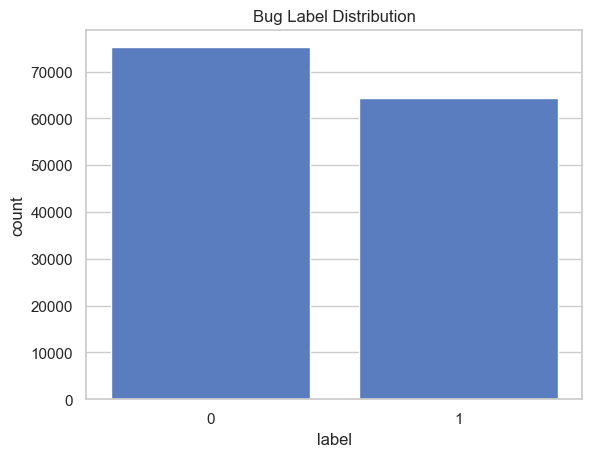

[EDA RESULT] Label counts: [(0, 75194), (1, 64351)]
[EDA RESULT] Label proportions: [(0, 0.5389), (1, 0.4611)]


In [19]:
logger.log_check("Checking Label Distribution...")
from matplotlib import pyplot as plt

# Plot
sns.countplot(x='label', data=df)
plt.title("Bug Label Distribution")
plt.show()

# Raw counts
label_counts = df["label"].value_counts()
logger.log_result(f"Label counts: {[(int(k), int(v)) for k, v in label_counts.items()]}")

# Proportions
label_props = df["label"].value_counts(normalize=True)
logger.log_result(f"Label proportions: {[(int(k), round(float(v), 4)) for k, v in label_props.items()]}")

## Repository Distribution

In [20]:
# %% 
logger.log_check("Checking commits per repository...")

repo_counts = df['repo'].value_counts()

# Plot
plt.figure(figsize=(10,5))
sns.barplot(x=repo_counts.index, y=repo_counts.values)
plt.title("Commits per Repository")
plt.ylabel("Number of Commits")
plt.xticks(rotation=45)
plt.show()

# Raw counts (one-line log)
logger.log_result(
    f"Repo commit counts: {[(repo, int(count)) for repo, count in repo_counts.items()]}"
)

# Proportions (one-line log)
repo_props = repo_counts / len(df)
logger.log_result(
    f"Repo commit proportions: {[(repo, round(float(prop), 4)) for repo, prop in repo_props.items()]}"
)

[EDA CHECK] Checking commits per repository...


KeyError: 'repo'

## Numeric Features with Negative Value

In [22]:
logger.log_check("Checking negative numeric features...")
from notebooks.constants import NUMERIC_FEATURES

negatives = []

for col in NUMERIC_FEATURES:
    # Calculate the total number of rows (non-NaN count) in the column
    total_count = df[col].count()

    # Calculate the number of negative values in the column
    negative_count = (df[col] < 0).sum()

    # Calculate the proportion of negative values
    if total_count > 0:
        proportion = negative_count / total_count
    else:
        proportion = 0  # Handle case where the column is entirely NaN or empty

    if proportion:
        logger.log_result(
            f"Negative Feature: **{col}** - Count of negative values: {negative_count} - Proportion of negative values: **{proportion:.4f}"
        )
        # log_result(f"Total entries (non-NaN): {total_count}")
        # log_result(f"Count of negative values: {negative_count}")
        # log_result(f"Proportion of negative values: **{proportion:.4f}**")

# log_result(f"Found following negative features: {negatives}")

for negative in negatives:
    print(df[negative].describe())

logger.log_result(f"Found following negative features: {negatives}")

[EDA CHECK] Checking negative numeric features...
[EDA RESULT] Found following negative features: []


## 5. Numeric Feature Distributions

Examine numeric columns such as `loc_added`, `loc_deleted`, `hunks_count`, `max_func_change`, etc.

[EDA CHECK] Checking Numeric Feature Distribution Shape (NAME, SKEW, KURT, MEAN, STD)...
[EDA RESULT] Numeric distributions summary: [('author_exp_pre', np.float64(-0.614), np.float64(-0.674), np.float64(4.432), np.float64(2.114)), ('author_recent_activity_pre', np.float64(-0.37), np.float64(-0.924), np.float64(2.914), np.float64(1.578)), ('loc_added', np.float64(-0.177), np.float64(-1.24), np.float64(2.983), np.float64(1.749)), ('loc_deleted', np.float64(-0.446), np.float64(-0.873), np.float64(3.54), np.float64(1.671)), ('files_changed', np.float64(0.227), np.float64(-1.14), np.float64(1.95), np.float64(1.058)), ('hunks_count', np.float64(-0.158), np.float64(-0.956), np.float64(3.152), np.float64(1.41)), ('msg_len', np.float64(0.218), np.float64(-0.808), np.float64(4.541), np.float64(0.859)), ('ast_delta', np.float64(0.343), np.float64(-1.629), np.float64(2.135), np.float64(2.288)), ('complexity_delta', np.float64(0.865), np.float64(-0.996), np.float64(0.625), np.float64(0.862)), ('ma

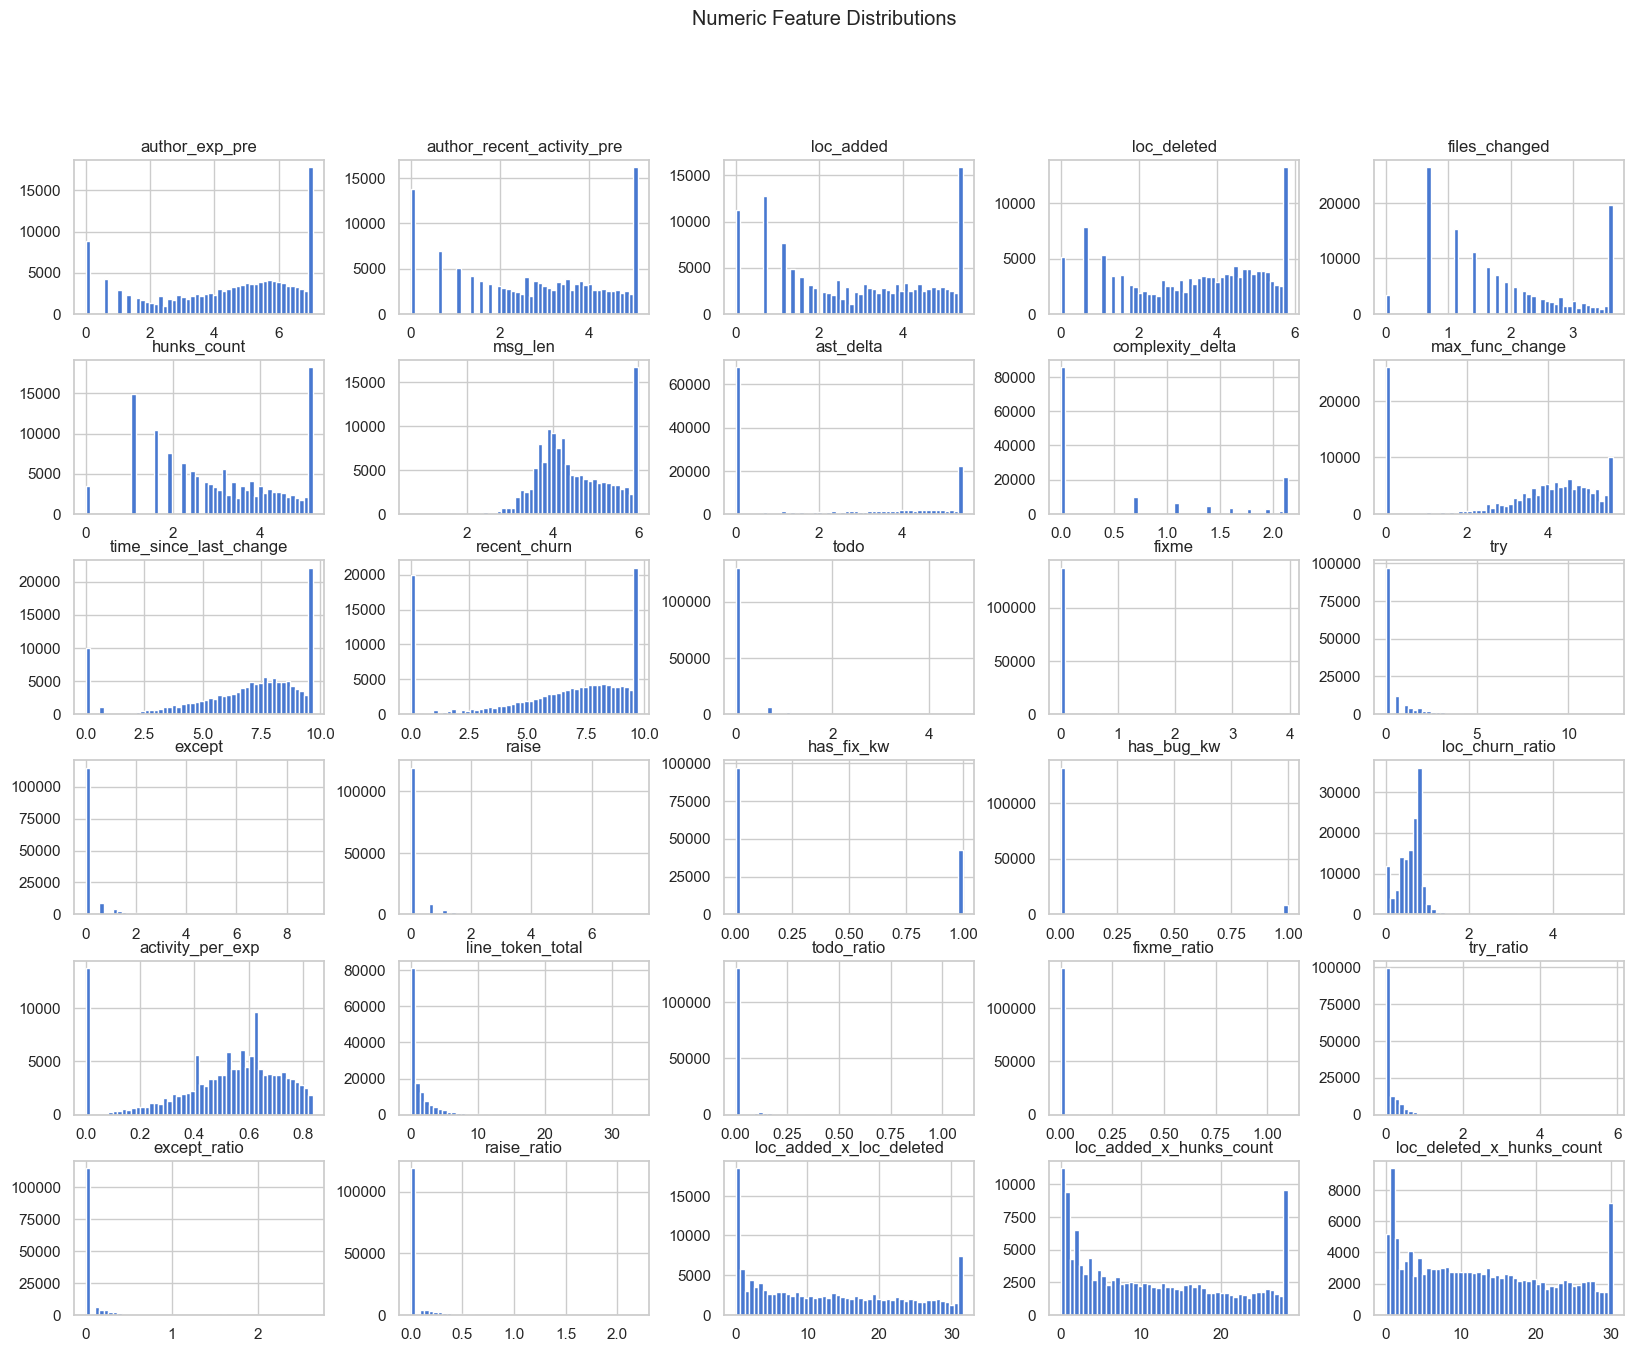

In [26]:
# %%
import scipy.stats as stats

from src_code.utils.utils import is_embedding_column

logger.log_check("Checking Numeric Feature Distribution Shape (NAME, SKEW, KURT, MEAN, STD)...")
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
num_cols.remove('label')  # exclude target

embedding_cols = [c for c in num_cols if is_embedding_column(c)]
other_numeric_cols = [c for c in num_cols if not is_embedding_column(c)]

summary = []

for col in other_numeric_cols:
    skew = round(stats.skew(df[col].dropna()), 3)
    kurt = round(stats.kurtosis(df[col].dropna()), 3)
    mean = round(df[col].mean(), 3)
    std = round(df[col].std(), 3)

    summary.append((col, skew, kurt, mean, std))

# Log as single line
logger.log_result(f"Numeric distributions summary: {summary}")

# Optional: still show hist plots for visual inspection
df[other_numeric_cols].hist(bins=50, figsize=(20, 15))
plt.suptitle("Numeric Feature Distributions")
plt.show()

### Embeddings

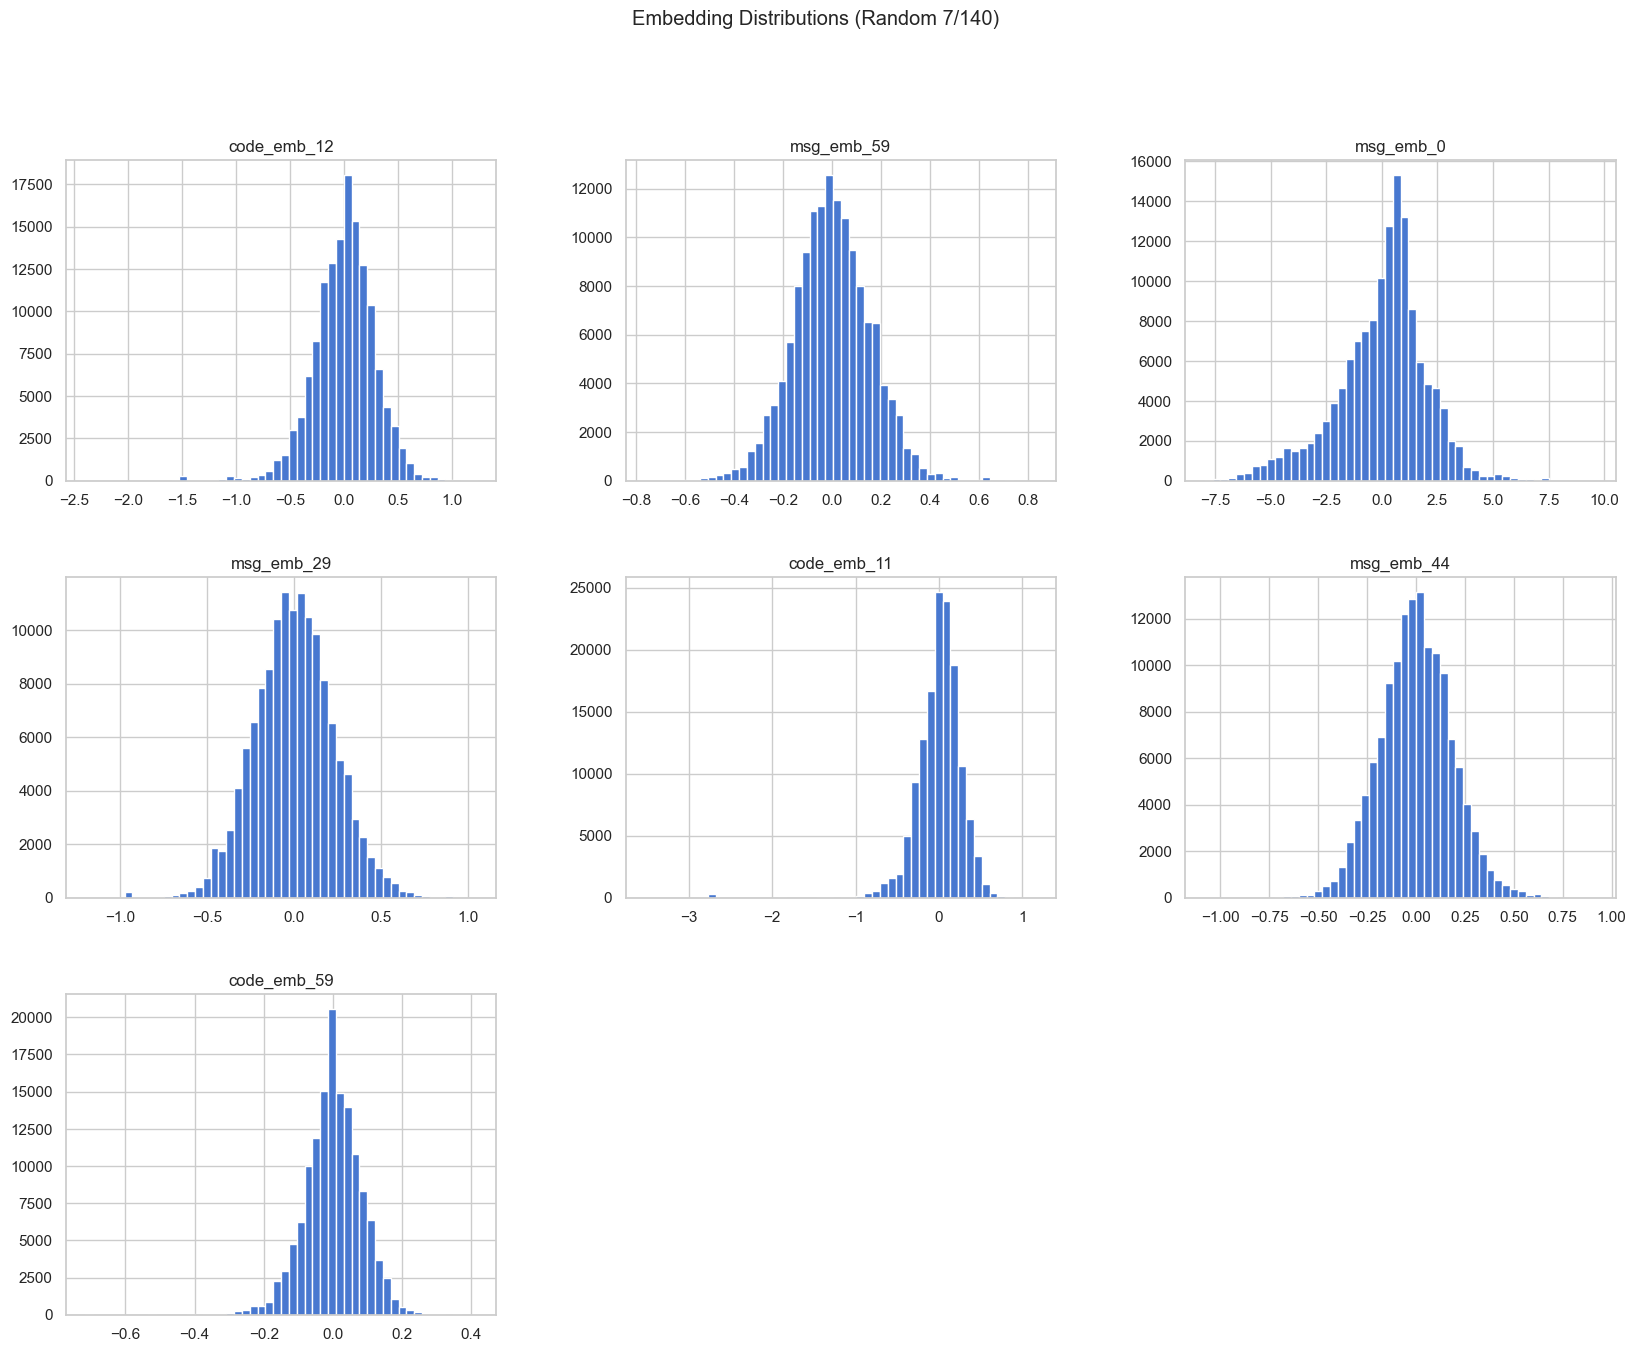

In [ ]:
from src_code.ml_pipeline.train import RANDOM_STATE


def sample_embeddings(embedding_cols, ratio=0.05, random_state=RANDOM_STATE):
    n_total = len(embedding_cols)
    n_sample = max(1, int(n_total * ratio))
    rng = np.random.default_rng(random_state)
    return rng.choice(embedding_cols, size=n_sample, replace=False).tolist()

sampled_emb_cols = sample_embeddings(embedding_cols, ratio=0.05)

df[sampled_emb_cols].hist(bins=50, figsize=(20, 15))
plt.suptitle(
    f"Embedding Distributions (Random {len(sampled_emb_cols)}/{len(embedding_cols)})"
)
plt.show()

### Log-transformed histograms for skewed metrics

In [31]:
# %% 

if INPUT_DF_PATH.parent == INTERIM_DATA_DIR:
    logger.log_check("Checking log-transformed skewed cols, output format - (NAME, SKEW, KURT, MEAN, STD)...")

    skewed_cols = ['loc_added', 'loc_deleted', 'files_changed', 'hunks_count', 
                'ast_delta', 'complexity_delta', 'max_func_change', 'recent_churn',
                'author_exp_pre', 'author_recent_activity_pre', 'msg_len']

    plt.figure(figsize=(20,15))
    for i, col in enumerate(skewed_cols, 1):
        col_log = np.log1p(df[col].dropna())

        plt.subplot(6,2,i)
        # sns.histplot(np.log1p(df[col]), bins=50, kde=True)
        sns.histplot(col_log, bins=50, kde=True)
        plt.title(f"log1p({col}) distribution")
        logger.log_result(
            f"{col}_log1p: skew={col_log.skew():.3f}, "
            f"kurt={col_log.kurtosis():.3f}, "
            f"mean={col_log.mean():.3f}, std={col_log.std():.3f}"
        )
    plt.tight_layout()
    plt.show()
elif INPUT_DF_PATH.parent == PROCESSED_DATA_DIR:
    logger.log_check("The loaded dataset has already been preprocessed - skipping log-transformation.", print_to_console=True)
else:
    err_msg = "Unknown parent of the input dataset!"
    logger.error(err_msg)
    raise ValueError(err_msg)

[EDA CHECK] The loaded dataset has already been preprocessed - skipping log-transformation.


## Correlations
Examine correlations between numeric features and label

[EDA CHECK] Computing correlation matrix...


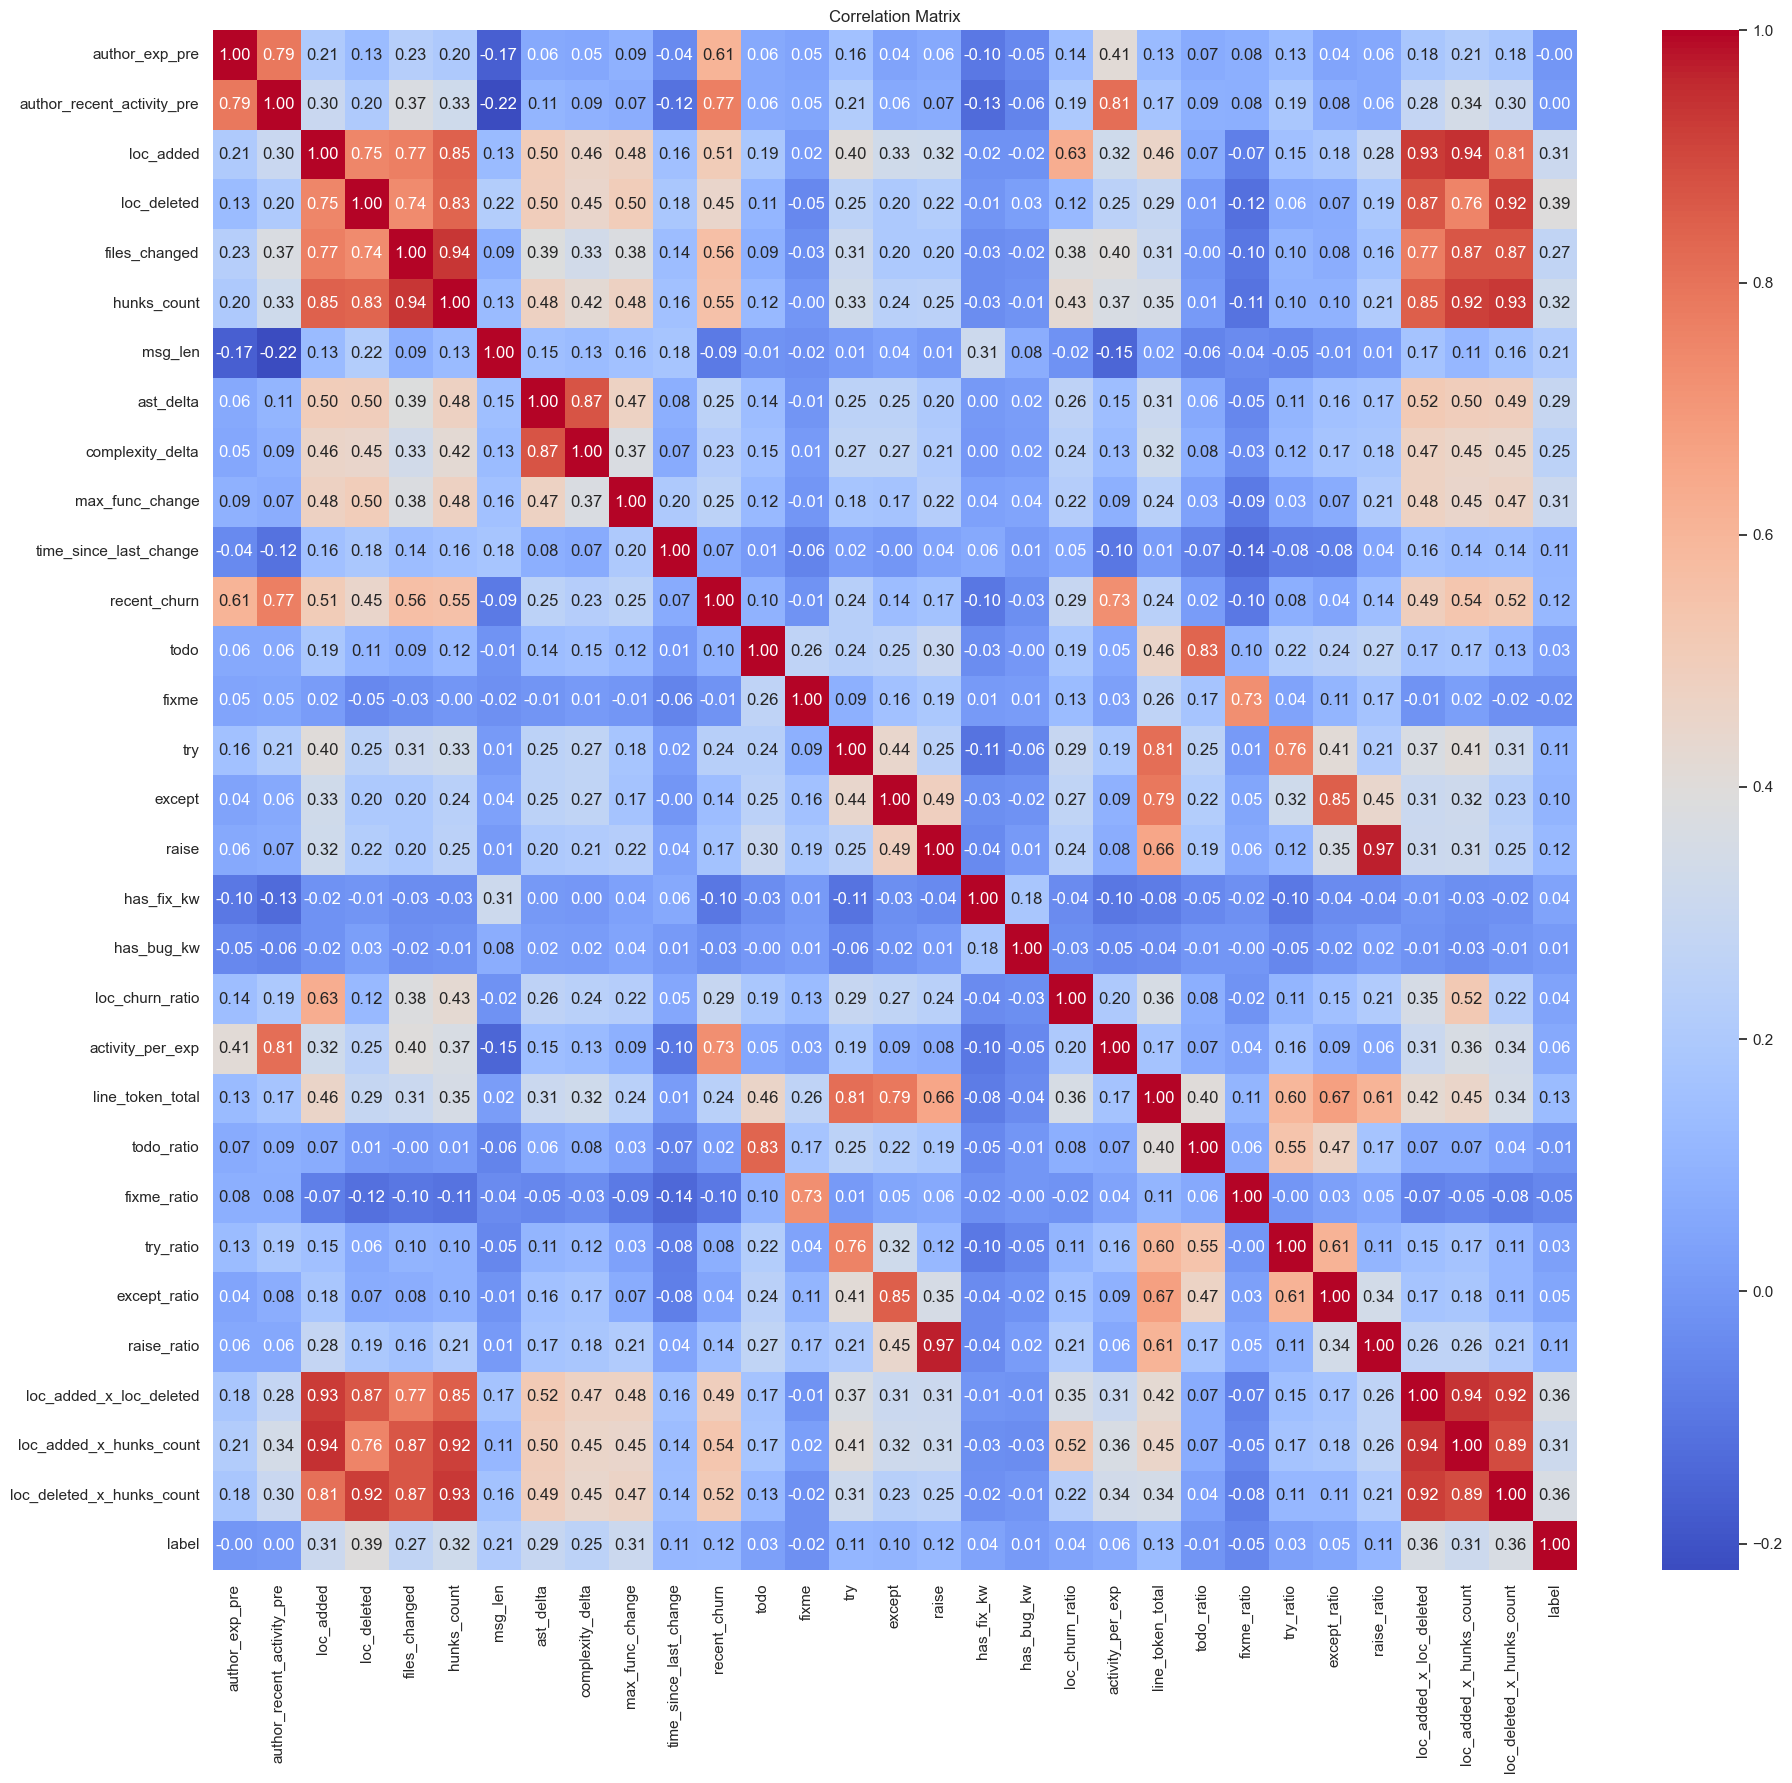

Correlations with label
label                         1.000000
loc_deleted                   0.390779
loc_added_x_loc_deleted       0.363522
loc_deleted_x_hunks_count     0.363393
hunks_count                   0.324631
loc_added_x_hunks_count       0.313921
loc_added                     0.312966
max_func_change               0.310437
ast_delta                     0.291437
files_changed                 0.274507
complexity_delta              0.251576
msg_len                       0.211483
line_token_total              0.134912
raise                         0.122469
recent_churn                  0.121780
time_since_last_change        0.113147
try                           0.111185
raise_ratio                   0.110203
except                        0.100970
activity_per_exp              0.062540
except_ratio                  0.048144
loc_churn_ratio               0.038765
has_fix_kw                    0.037617
try_ratio                     0.028975
todo                          0.028296
h

In [32]:
# %%
logger.log_check("Computing correlation matrix...")

corr_matrix = df[other_numeric_cols + ['label']].corr()
plt.figure(figsize=(22,20))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

print("Correlations with label")
print("===========")
# Correlation with label
corr_with_label = corr_matrix['label'].sort_values(ascending=False)
print(corr_with_label)

# Log correlations for each feature on separate line
logger.log_check("Logging correlations for each feature...")

for feature in corr_matrix.columns:
    # Create a compact list of (other_feature, corr)
    correlations = [
        (other, float(corr_matrix.at[feature, other]))
        for other in corr_matrix.columns
        if other != feature
    ]

    logger.log_result(f"{feature}: {correlations}")

## Categorical Features and File Types

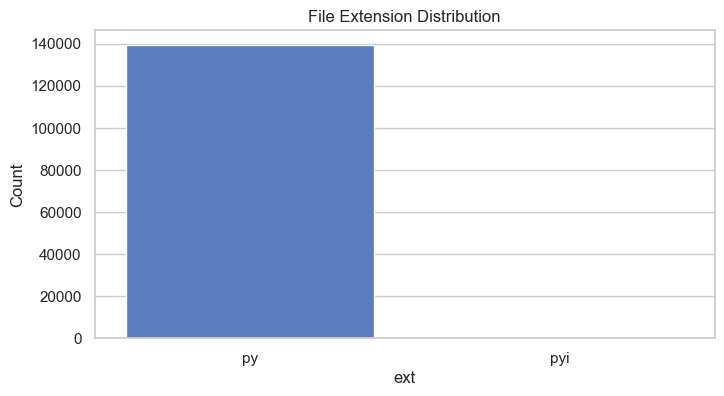

In [51]:
# %%
log_check("Checking File Extension Distribution...")

# Compute extensions
df['ext'] = df['filepath'].str.split('.').str[-1]

# Counts
ext_counts = df['ext'].value_counts()
log_result(f"Extension counts: {ext_counts.to_dict()}")

# Proportions
ext_props = (ext_counts / len(df)).round(4)
log_result(f"Extension proportions: {ext_props.to_dict()}")

# Plot
plt.figure(figsize=(8,4))
sns.barplot(x=ext_counts.index, y=ext_counts.values)
plt.title("File Extension Distribution")
plt.ylabel("Count")
plt.show()

## Commit Message and Code Text Analysis

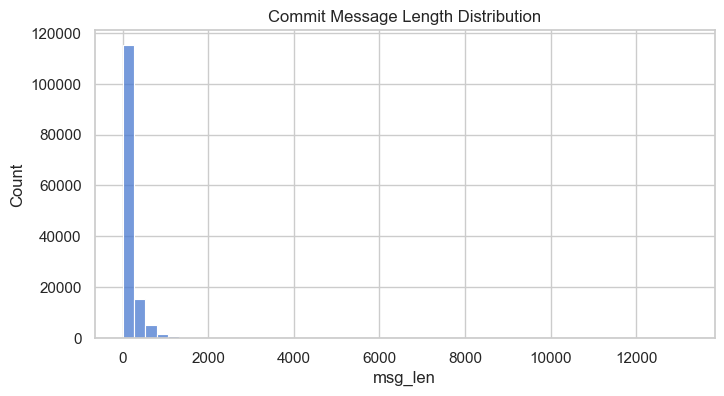

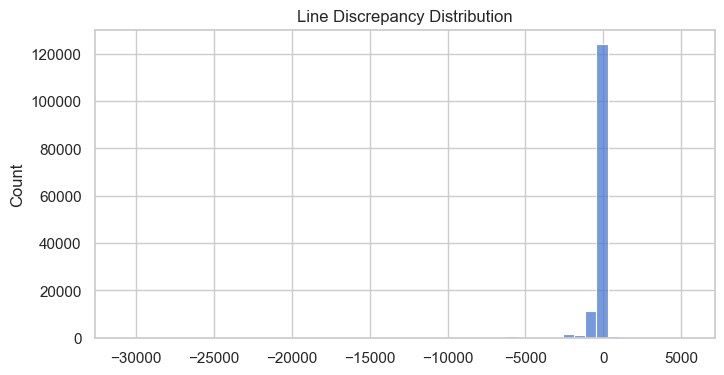

In [52]:
# %%
log_check("Checking Commit Message Length Distribution...")

# --- Commit message lengths ---
msg_stats = df['msg_len'].describe().to_dict()
log_result(f"msg_len stats: {msg_stats}")

plt.figure(figsize=(8,4))
sns.histplot(df['msg_len'], bins=50)
plt.title("Commit Message Length Distribution")
plt.show()


# --- Empty content rows ---
empty_content = int((df['content'].str.len() == 0).sum())
log_result(f"Empty content rows: {empty_content}")


# --- Line discrepancy analysis ---
log_check("Checking line count discrepancy (content_lines - loc_added - loc_deleted)...")

line_discrepancy = df["content"].str.count("\n") - df["loc_added"] - df["loc_deleted"]
disc_stats = line_discrepancy.describe().to_dict()

# Convert numpy values to python floats
disc_stats = {k: float(v) for k, v in disc_stats.items()}

log_result(f"line_discrepancy stats: {disc_stats}")

# Optional plot (not logged)
plt.figure(figsize=(8,4))
sns.histplot(line_discrepancy, bins=50)
plt.title("Line Discrepancy Distribution")
plt.show()

Very short messages may need normalization.

## Outliers


### Detection
Detect extreme values in `time_since_last_change`, `recent_churn`, `loc_added`, etc.

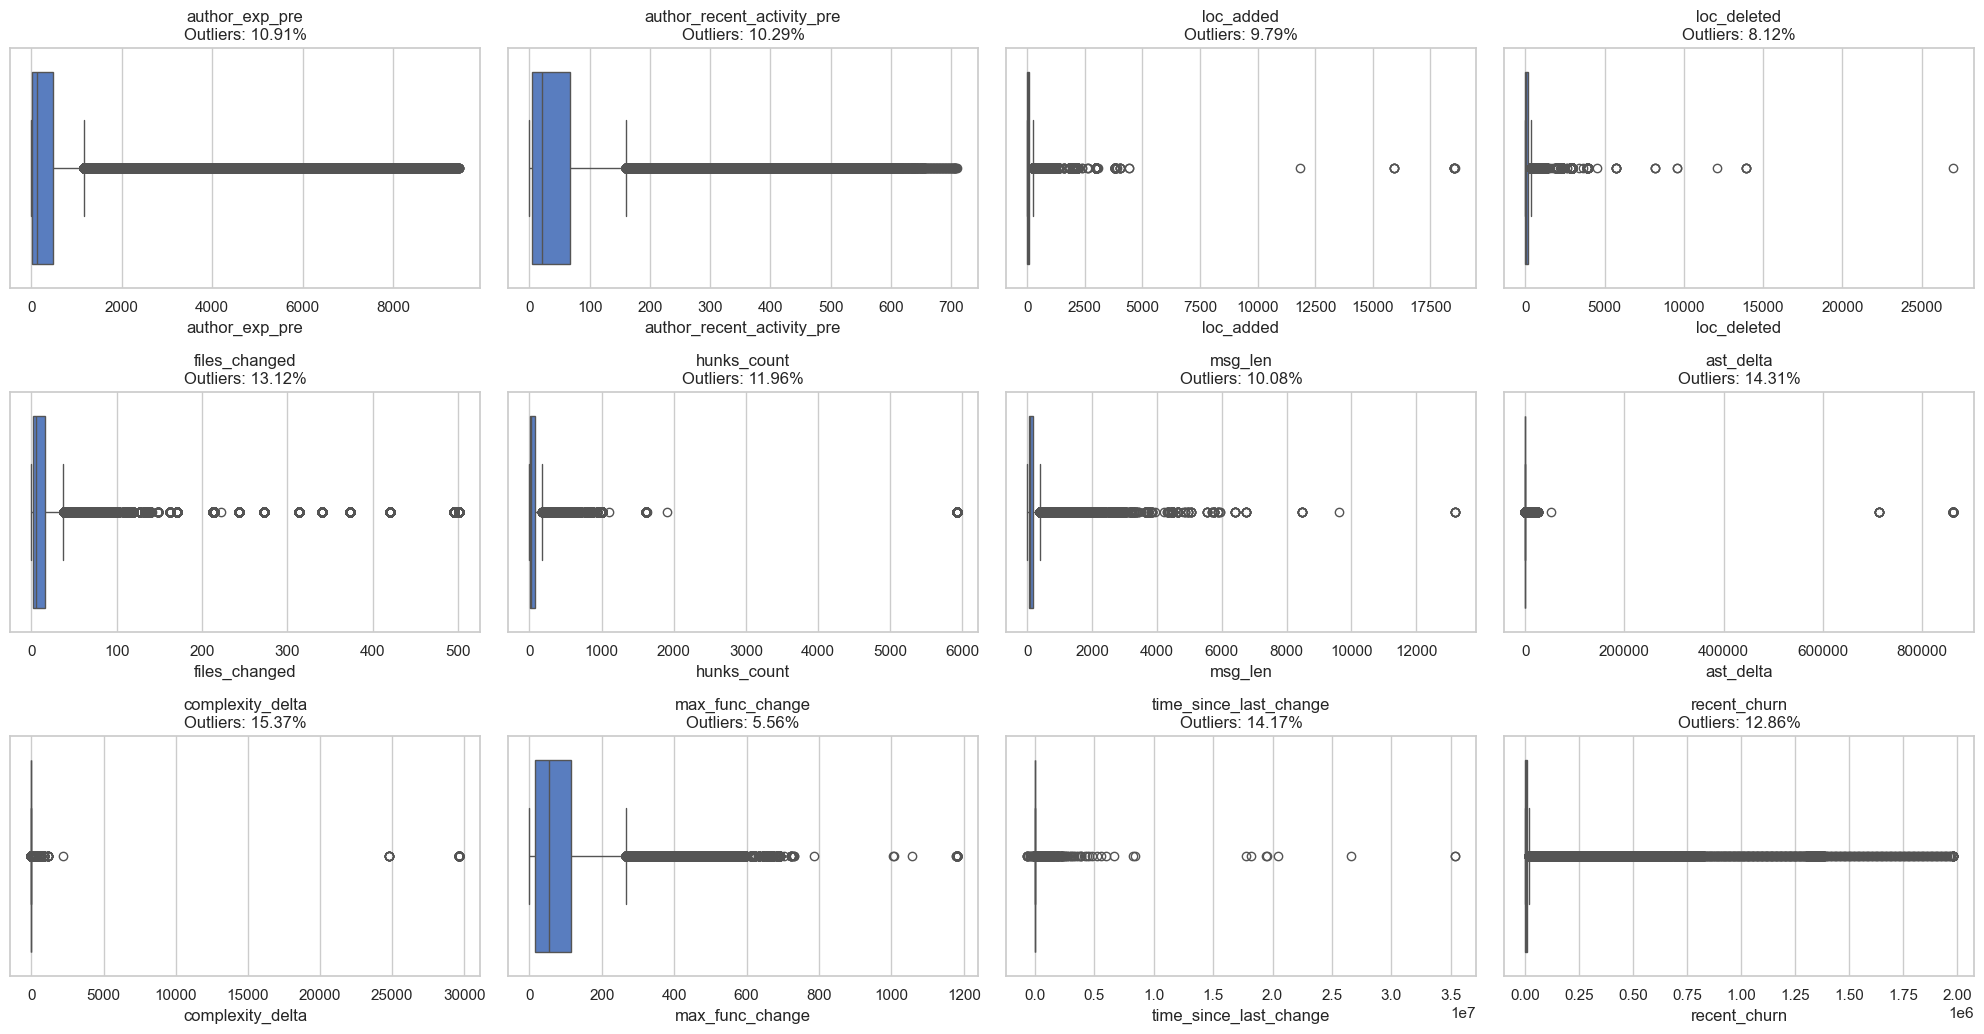

In [53]:

import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from constants import NUMERIC_FEATURES

def plot_boxplots_with_outliers(df, features, cols=4):
    log_check("Boxplot outlier analysis (feature, outlier%, bounds, mean, std, min, max)...")

    rows = math.ceil(len(features) / cols)
    plt.figure(figsize=(cols * 5, rows * 3.5))

    for i, feature in enumerate(features, 1):
        series = df[feature].dropna()

        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        outlier_mask = (series < lower) | (series > upper)
        outlier_ratio = float(outlier_mask.mean())
        n_outliers = int(outlier_mask.sum())

        # Additional stats
        mean = float(series.mean())
        std = float(series.std())
        min_val = float(series.min())
        max_val = float(series.max())

        # ---- LOG ENTRY (1 line per feature) ----
        log_result(
            f"{feature}: outliers={outlier_ratio:.2%} ({n_outliers} rows), "
            f"bounds=({lower:.3f}, {upper:.3f}), "
            f"min={min_val:.3f}, max={max_val:.3f}, "
            f"mean={mean:.3f}, std={std:.3f}"
        )

        # ---- PLOT ----
        plt.subplot(rows, cols, i)
        sns.boxplot(x=series, linewidth=1)
        plt.title(f"{feature}\nOutliers: {outlier_ratio:.2%}")

    plt.tight_layout()
    plt.show()


# Call it
plot_boxplots_with_outliers(df, NUMERIC_FEATURES)

## 10. Code and Message Embeddings

Quick check of embedding norms and distribution

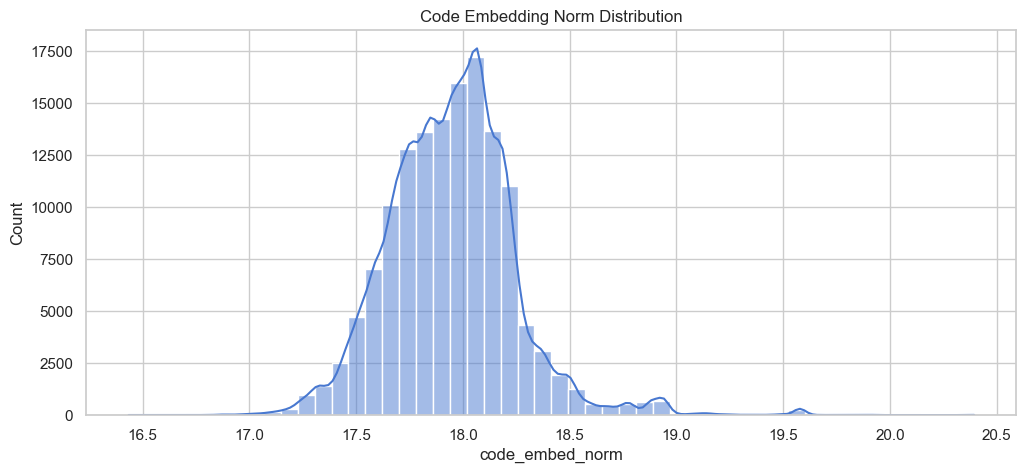

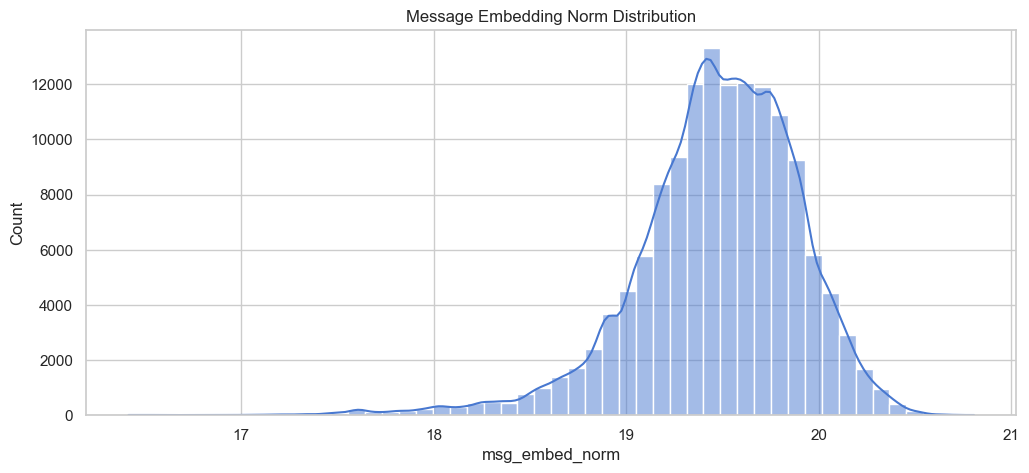

In [54]:
# %% 
log_check("Checking Embedding Norm Distributions (NAME, SKEW, KURT, MEAN, STD)...")

from scipy.stats import skew, kurtosis

df['code_embed_norm'] = df['code_embed'].apply(lambda x: np.linalg.norm(x))
df['msg_embed_norm'] = df['msg_embed'].apply(lambda x: np.linalg.norm(x))

plt.figure(figsize=(12,5))
sns.histplot(df['code_embed_norm'], bins=50, kde=True)
plt.title("Code Embedding Norm Distribution")
plt.show()

plt.figure(figsize=(12,5))
sns.histplot(df['msg_embed_norm'], bins=50, kde=True)
plt.title("Message Embedding Norm Distribution")
plt.show()

for col in ["code_embed_norm", "msg_embed_norm"]:
    series = df[col].dropna()
    series_skew = skew(series)
    series_kurt = kurtosis(series)
    series_mean = series.mean()
    series_std = series.std()
    
    log_result(f"{col}: skew={series_skew:.3f}, kurt={series_kurt:.3f}, mean={series_mean:.3f}, std={series_std:.3f}")


## 11. Outlier & Negative `time_since_last_change` by Repo

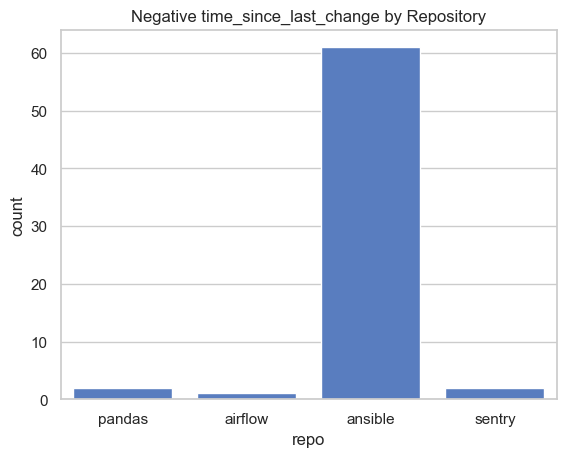

In [55]:
# %% 
log_check("Checking Negative time_since_last_change per Repository...")

# neg_times = df[df['time_since_last_change'] < 0]
# neg_times['repo'].value_counts()
neg_times = df[df['time_since_last_change'] < 0]
neg_repo_counts = neg_times['repo'].value_counts()
neg_repo_props = neg_repo_counts / len(df)

for repo in neg_repo_counts.index:
    count = neg_repo_counts[repo]
    prop = neg_repo_props[repo]
    log_result(f"{repo}: count={count}, proportion={prop:.3%}")
sns.countplot(x='repo', data=neg_times)
plt.title("Negative time_since_last_change by Repository")
plt.show()

Ansible has an extremely branch-heavy development model, with large numbers of parallel feature branches → this explains why Ansible dominates your negatives.

Because Ansible's development process is:

- highly distributed
- patch-based
- very branch-heavy
- contains large numbers of old branches merged late
- frequent external contributors with old author dates
- multiple maintainers commit patches on their behalf

This creates many opportunities for chronologically inconsistent commit sequences.

## 12. Feature Relationships with Label

Boxplots of numeric features by label

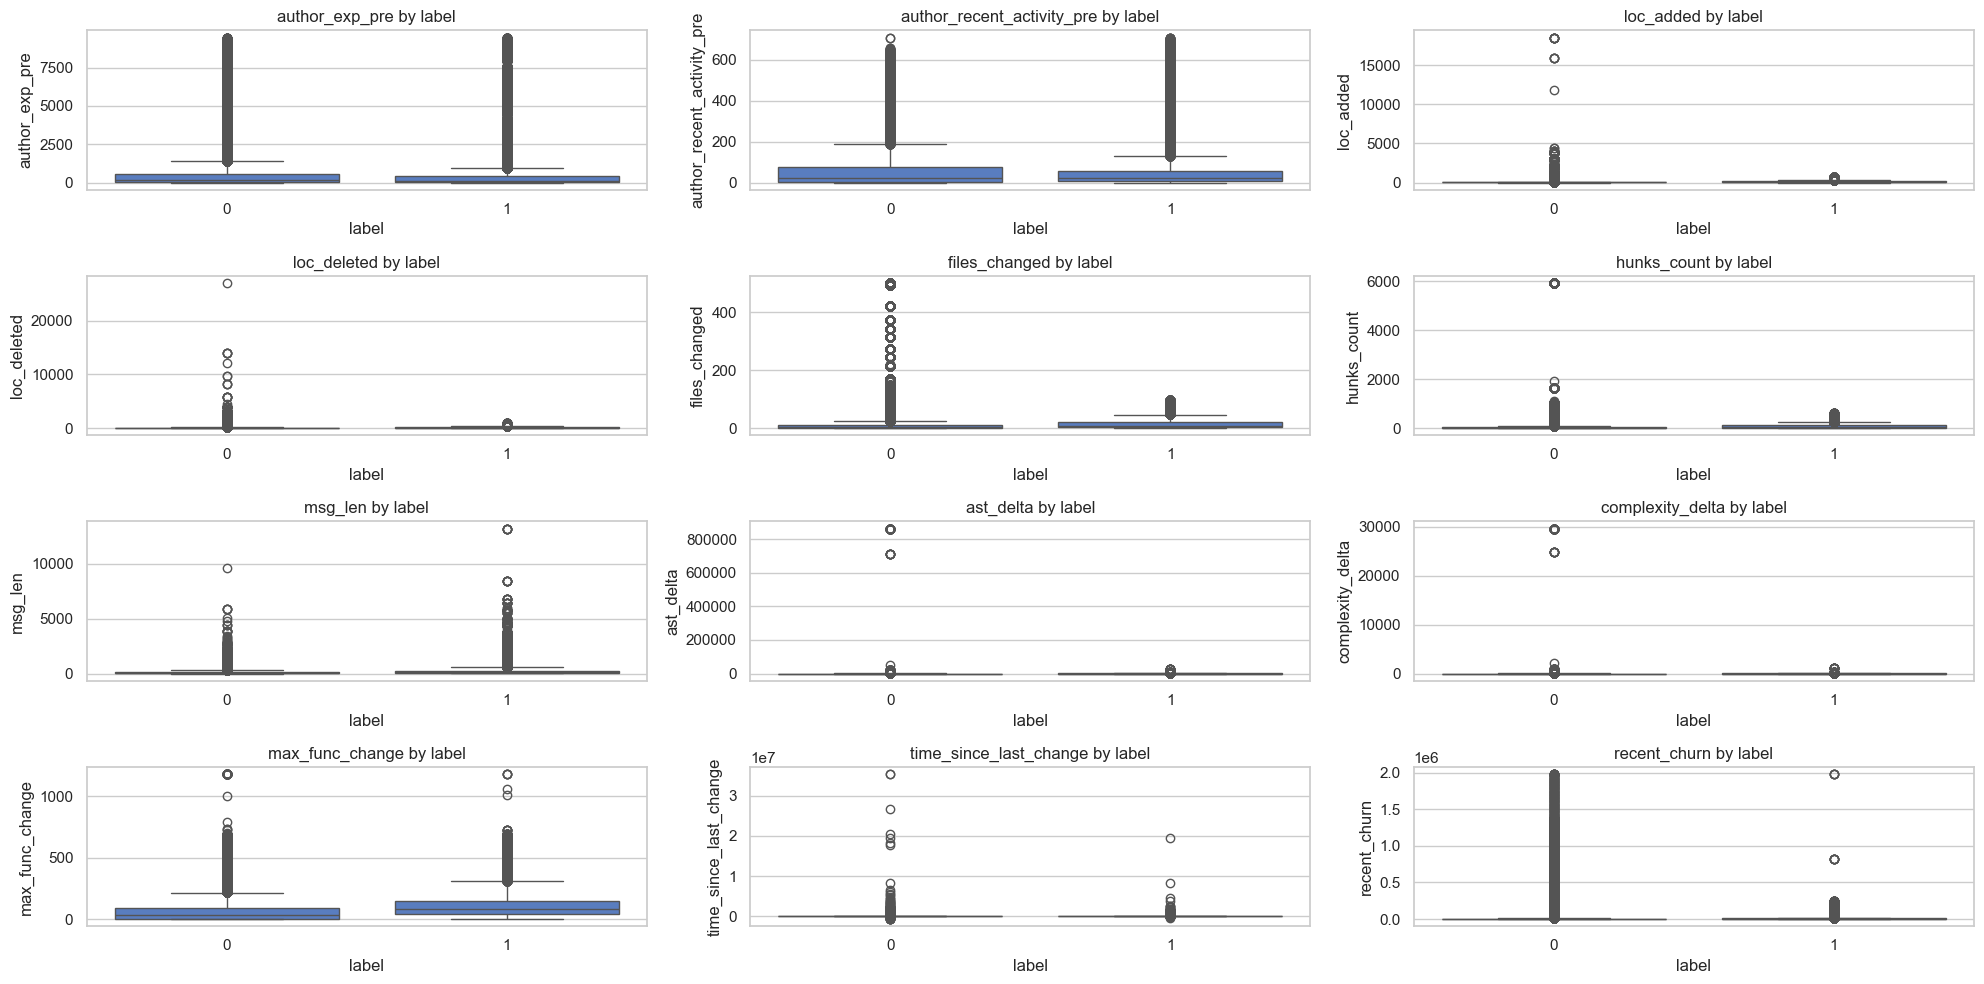

In [56]:
log_check("Checking Feature Distributions by Label... (median, IQR, min, max, outlier_ratio)")

# Logging metrics
for feature in NUMERIC_FEATURES:
    for lbl in df['label'].unique():
        series = df[df['label'] == lbl][feature].dropna()
        Q1 = series.quantile(0.25)
        Q3 = series.quantile(0.75)
        IQR = Q3 - Q1
        median = series.median()
        min_val, max_val = series.min(), series.max()
        outlier_ratio = ((series < Q1 - 1.5*IQR) | (series > Q3 + 1.5*IQR)).mean()
        log_result(f"{feature} | label={lbl} | median={median:.2f}, IQR={IQR:.2f}, min={min_val:.2f}, max={max_val:.2f}, outlier_ratio={outlier_ratio:.2%}")

# Plotting
plt.figure(figsize=(20,10))
for i, col in enumerate(NUMERIC_FEATURES, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(x='label', y=col, data=df)
    plt.title(f"{col} by label")

plt.tight_layout()
plt.show()

## 13. Keyword Features (todo, fixme, try/except/raise)

<Figure size 1500x500 with 0 Axes>

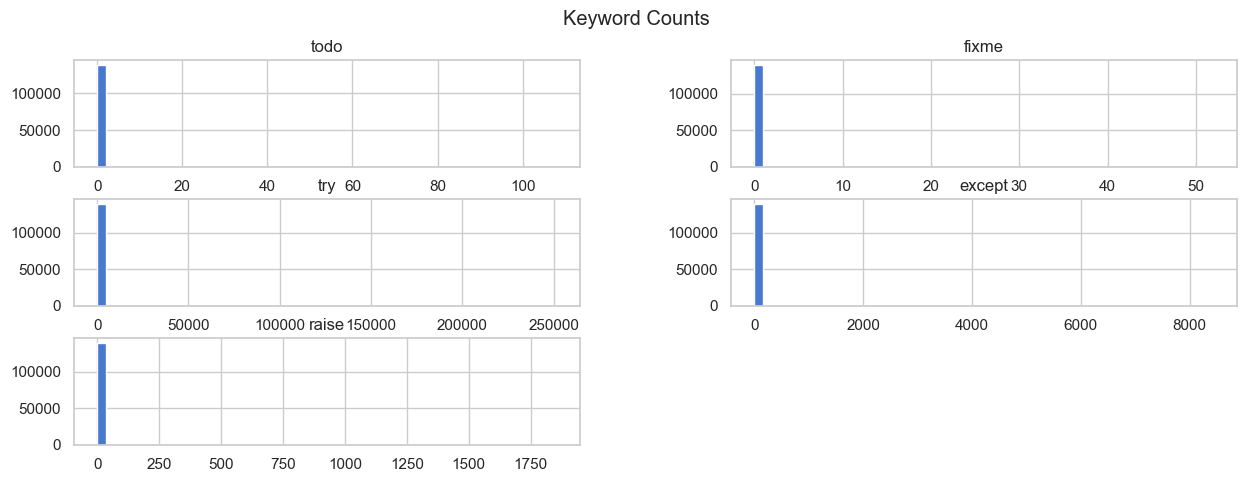

In [57]:
# %% 
log_check("Checking Keyword Count Distributions... (median, IQR, min, max, zero_ratio)")

from matplotlib import pyplot as plt


# kw_cols = ['todo','fixme','try','except','raise']
from notebooks.constants import LINE_TOKEN_FEATURES


plt.figure(figsize=(15,5))
df[LINE_TOKEN_FEATURES].hist(bins=50, figsize=(15,5))
plt.suptitle("Keyword Counts")
plt.show()

for feature in LINE_TOKEN_FEATURES:
    series = df[feature].dropna()
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    median = series.median()
    min_val, max_val = series.min(), series.max()
    zero_ratio = (series == 0).mean()
    
    log_result(
        f"{feature} | median={median:.2f}, IQR={IQR:.2f}, min={min_val}, max={max_val}, zero_ratio={zero_ratio:.2%}"
    )

## 14. Pairwise Relationships
 
Due to high cardinality, use only selected features

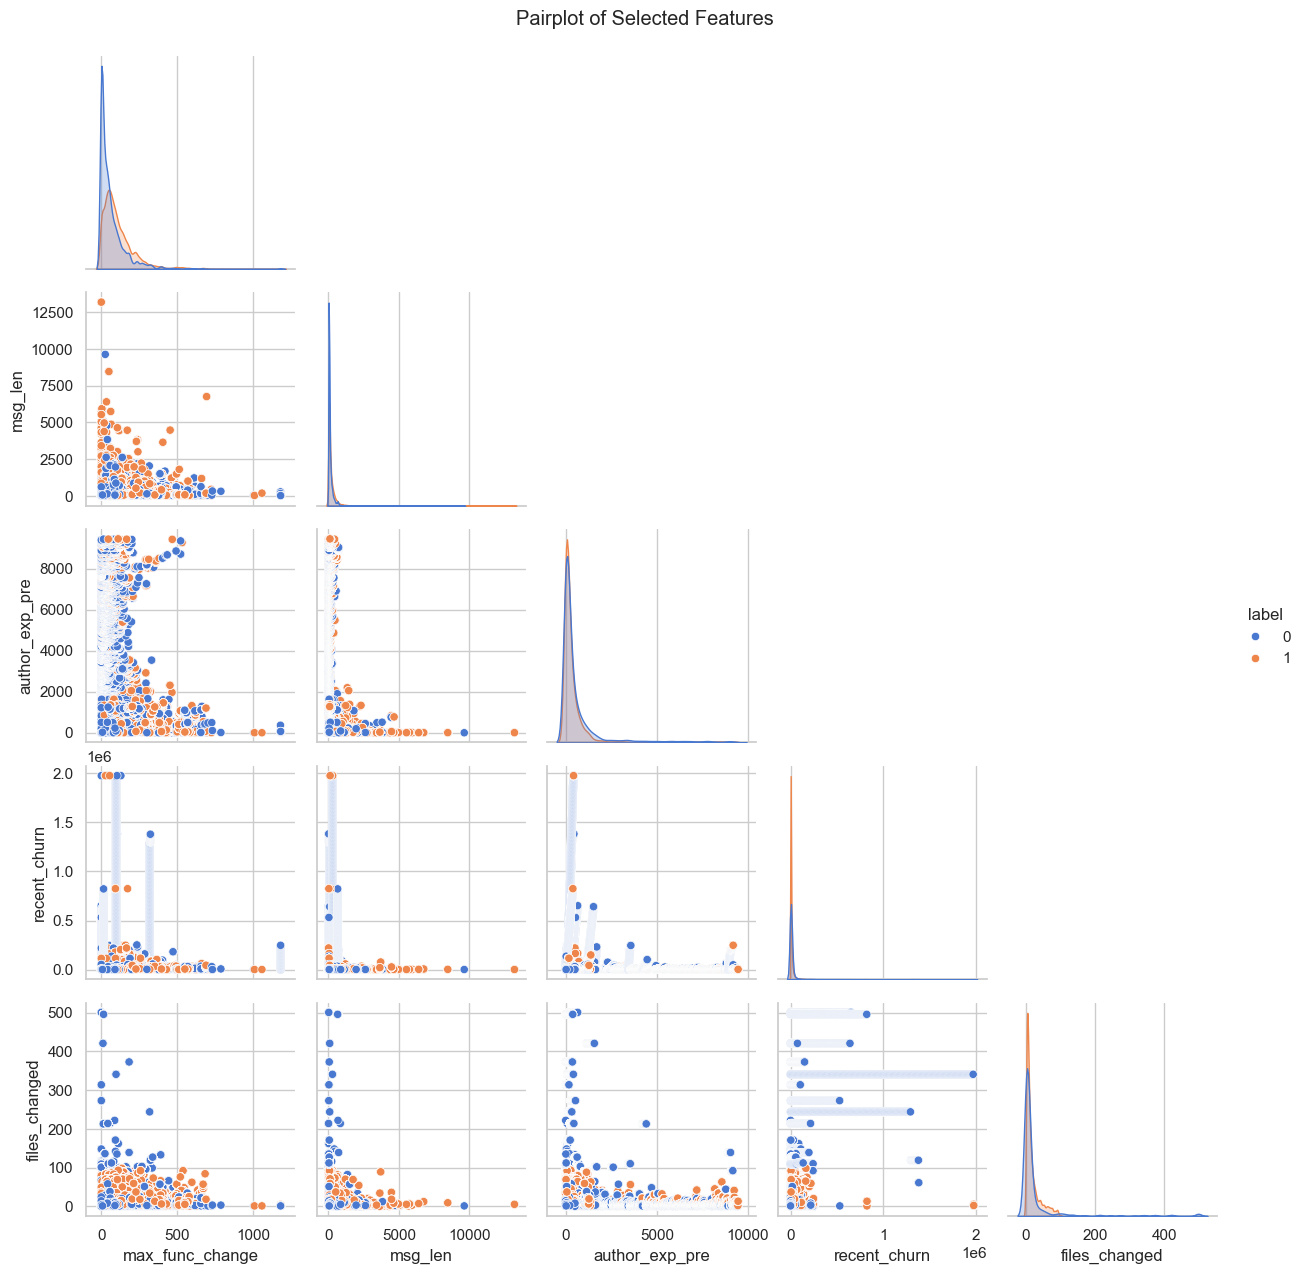

In [58]:
# %% 
TOP_FEATURES = 5

# Compute correlations with label
corr_with_label = df[num_cols + ['label']].corr()['label'].drop('label')  # exclude label itself

# Take top N correlated features
selected_features = corr_with_label.abs().sort_values(ascending=False).head(TOP_FEATURES).index.to_list()

# Add label back for hue
selected_features.append('label')

# print(selected_features)

# # selected_features = ['loc_added', 'loc_deleted', 'hunks_count', 'max_func_change', 'label']
# sns.pairplot(df[selected_features], hue='label', corner=True)
# plt.suptitle("Pairplot of Selected Features", y=1.02)
# plt.show()

# selected_features
log_check("Checking Selected Feature Distributions and Correlations... (median, IQR, min, max, overlap)")

# Exclude label for stats
features_only = selected_features[:-1]

# Log per-feature stats + overlap coefficient
for feature in features_only:
    series0 = df[df['label'] == 0][feature].dropna()
    series1 = df[df['label'] == 1][feature].dropna()

    # Basic stats on full feature
    median = df[feature].median()
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    min_val, max_val = df[feature].min(), df[feature].max()

    # Overlap between label groups
    bins = np.histogram_bin_edges(df[feature], bins='auto')
    hist0, _ = np.histogram(series0, bins=bins, density=True)
    hist1, _ = np.histogram(series1, bins=bins, density=True)
    overlap = np.sum(np.minimum(hist0, hist1)) * np.diff(bins)[0]

    log_result(
        f"{feature} | median={median:.2f}, IQR={IQR:.2f}, min={min_val:.2f}, max={max_val:.2f}, overlap={overlap:.2f}"
    )

# Log pairwise correlations among selected features (excluding label)
for i, feat1 in enumerate(features_only):
    for feat2 in features_only[i+1:]:
        corr_val = df[[feat1, feat2]].corr().iloc[0,1]
        log_result(f"Correlation {feat1} & {feat2}: {corr_val:.2f}")

# %%
# Pairplot for visualization
sns.pairplot(df[selected_features], hue='label', corner=True)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

### 15. Optional: t-SNE / PCA on Embeddings

Reduce embedding dimensions to 2D to visualize clustering by label

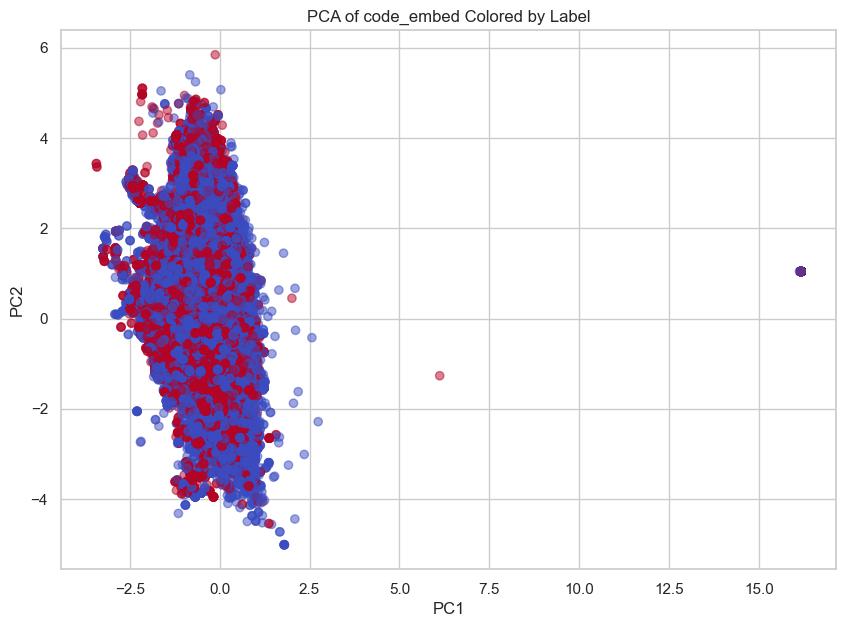

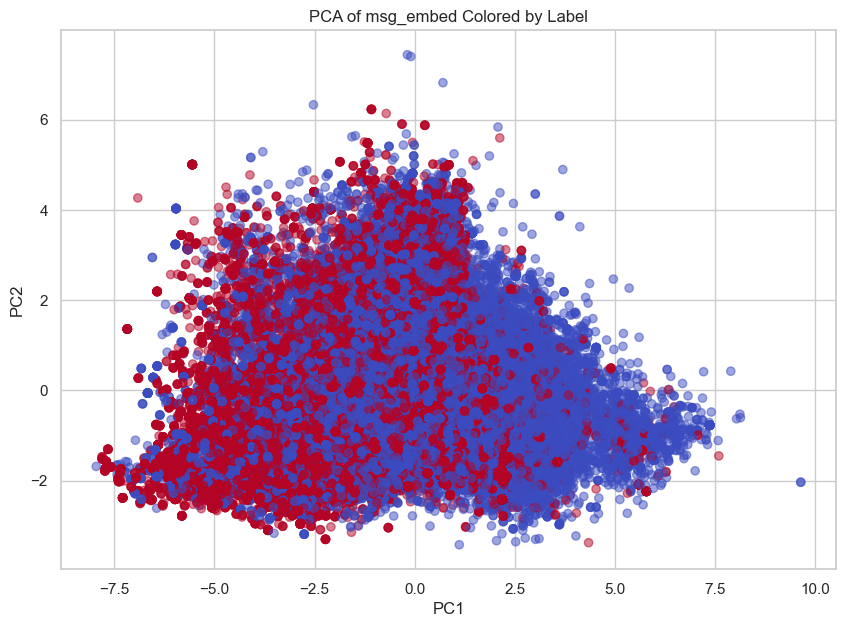

In [59]:
# # %% 
# from sklearn.decomposition import PCA
# from sklearn.metrics import pairwise_distances
# import matplotlib.pyplot as plt

# from constants import EMBEDDINGS

# pca_code = PCA(n_components=2)
# code_emb_2d = pca_code.fit_transform(np.vstack(df['code_embed'].values))

# # Variance explained
# var_explained = pca_code.explained_variance_ratio_
# log_check("PCA of code embeddings")
# log_result(f"Explained variance by PC1: {var_explained[0]:.2%}, PC2: {var_explained[1]:.2%}")

# # Compute mean distance between labels in 2D
# labels = df['label'].values
# points_label0 = code_emb_2d[labels == 0]
# points_label1 = code_emb_2d[labels == 1]

# sample_size = 2000  # or 2000 depending on your RAM

# points_label0_sample = points_label0[np.random.choice(points_label0.shape[0], sample_size, replace=False)]
# points_label1_sample = points_label1[np.random.choice(points_label1.shape[0], sample_size, replace=False)]

# inter_label_dist = pairwise_distances(points_label0_sample, points_label1_sample).mean()
# intra_dist_label0 = pairwise_distances(points_label0_sample).mean()
# intra_dist_label1 = pairwise_distances(points_label1_sample).mean()

# # Mean Euclidean distance between points of different labels
# # inter_label_dist = pairwise_distances(points_label0, points_label1).mean()
# log_result(f"Mean distance between label 0 and 1 in PCA 2D space: {inter_label_dist:.3f}")

# # Mean intra-label distances
# # intra_dist_label0 = pairwise_distances(points_label0).mean()
# # intra_dist_label1 = pairwise_distances(points_label1).mean()
# log_result(f"Mean intra-label distances - label 0: {intra_dist_label0:.3f}, label 1: {intra_dist_label1:.3f}")

# plt.figure(figsize=(10,7))
# plt.scatter(code_emb_2d[:,0], code_emb_2d[:,1], c=df['label'], cmap='coolwarm', alpha=0.5)
# plt.title("PCA of Code Embeddings Colored by Label")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()
# %% 
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import numpy as np

from constants import EMBEDDINGS

sample_size = 2000  # safe for memory

for emb_name in EMBEDDINGS:
    log_check(f"PCA of {emb_name}")

    # Stack embeddings into 2D array
    emb_matrix = np.vstack(df[emb_name].values)

    # PCA to 2D
    pca = PCA(n_components=2)
    emb_2d = pca.fit_transform(emb_matrix)

    # Explained variance
    var_explained = pca.explained_variance_ratio_
    log_result(f"{emb_name} - Explained variance by PC1: {var_explained[0]:.2%}, PC2: {var_explained[1]:.2%}")

    # Split by labels
    labels = df['label'].values
    points_label0 = emb_2d[labels == 0]
    points_label1 = emb_2d[labels == 1]

    # Sampling to avoid memory issues
    points_label0_sample = points_label0[np.random.choice(points_label0.shape[0], min(sample_size, points_label0.shape[0]), replace=False)]
    points_label1_sample = points_label1[np.random.choice(points_label1.shape[0], min(sample_size, points_label1.shape[0]), replace=False)]

    # Distances
    inter_label_dist = pairwise_distances(points_label0_sample, points_label1_sample).mean()
    intra_dist_label0 = pairwise_distances(points_label0_sample).mean()
    intra_dist_label1 = pairwise_distances(points_label1_sample).mean()

    log_result(f"{emb_name} - Mean distance between label 0 and 1 in PCA 2D space: {inter_label_dist:.3f}")
    log_result(f"{emb_name} - Mean intra-label distances: label 0: {intra_dist_label0:.3f}, label 1: {intra_dist_label1:.3f}")

    # Plot
    plt.figure(figsize=(10,7))
    plt.scatter(emb_2d[:,0], emb_2d[:,1], c=df['label'], cmap='coolwarm', alpha=0.5)
    plt.title(f"PCA of {emb_name} Colored by Label")
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    plt.show()

#### Interpretation:

- If points of different labels cluster separately → the embeddings capture some discriminative information for predicting bugs.
- If points overlap heavily → embeddings might not strongly differentiate buggy vs. non-buggy commits.
- You can also get an idea of outliers or general spread of the embeddings.

This visualization helps you explore how informative the embeddings are for your target labels in 2D space.

## Target Proportion

In [60]:
# Assuming your target column is named 'label'
proportions = df['label'].value_counts(normalize=True)

print("--- Proportions (Fraction) ---")
print(proportions)

--- Proportions (Fraction) ---
label
0    0.539041
1    0.460959
Name: proportion, dtype: float64
